C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_1852/1459956761.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

Gradient Boosting Machines (GBM)
Train RMSE: 22.64418
Test RMSE: 12.73982
Train MAE: 15.92189
Test MAE: 11.19859
Train SMAPE: 15.11292
Test SMAPE: 61.81399
Train R2: 0.88258
Test R2: -0.10562
Execution Time: 0.06405 seconds
CPU Usage: 34.60000 MHz
Memory Used: 22320.54170 MB

Random Forest
Train RMSE: 16.43484
Test RMSE: 13.57460
Train MAE: 11.53019
Test MAE: 11.32157
Train SMAPE: 11.84980
Test SMAPE: 64.71832
Train R2: 0.93815
Test R2: -0.25526
Execution Time: 0.19939 seconds
CPU Usage: 55.80000 MHz
Memory Used: 22302.70771 MB

Linear Regression
Train RMSE: 28.12167
Test RMSE: 12.96196
Train MAE: 19.11331
Test MAE: 10.75652
Train SMAPE: 16.76825
Test SMAPE: 61.22253
Train R2: 0.81891
Test R2: -0.14451
Execution Time: 0.06835 seconds
CPU Usage: 20.80000 MHz
Memory Used: 22300.27878 MB

Voting
Train RMSE: 21.32146
Test RMSE: 12.62110
Train MAE: 14.92862
Test MAE: 10.99554
Train SMAPE: 14.25676
Test SMAPE: 62.35839
Train R2: 0.89590
Test R2: -0.08511
Execution Time: 0.26345 seconds
CPU U

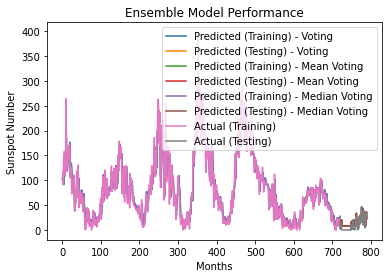

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import time
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the models
models = [
    ('Gradient Boosting Machines (GBM)', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Linear Regression', LinearRegression())
]

ensemble_methods = {
    'Voting': VotingRegressor(estimators=models),
    'Mean Voting': VotingRegressor(estimators=models, weights=[1, 1, 1]),
    'Median Voting': VotingRegressor(estimators=models, weights=[1, 1, 1])
}

results = []

for name, model in models + list(ensemble_methods.items()):
    start_time = time.time()
    
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    cpu_usage = psutil.cpu_percent()
    memory_used = psutil.virtual_memory().used / 1e6

    execution_time = time.time() - start_time

    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train SMAPE': train_smape,
        'Test SMAPE': test_smape,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Execution Time': execution_time,
        'CPU Usage': cpu_usage,
        'Memory Used': memory_used,
        'Train Predictions': train_predictions.flatten(),
        'Test Predictions': test_predictions.flatten()
    })

# Print the results
for result in results:
    print(result['Model'])
    print(f"Train RMSE: {result['Train RMSE']:.5f}")
    print(f"Test RMSE: {result['Test RMSE']:.5f}")
    print(f"Train MAE: {result['Train MAE']:.5f}")
    print(f"Test MAE: {result['Test MAE']:.5f}")
    print(f"Train SMAPE: {result['Train SMAPE']:.5f}")
    print(f"Test SMAPE: {result['Test SMAPE']:.5f}")
    print(f"Train R2: {result['Train R2']:.5f}")
    print(f"Test R2: {result['Test R2']:.5f}")
    print(f"Execution Time: {result['Execution Time']:.5f} seconds")
    print(f"CPU Usage: {result['CPU Usage']:.5f} MHz")
    print(f"Memory Used: {result['Memory Used']:.5f} MB")
    print()

# Plot the predictions
for i, result in enumerate(results):
    if i >= 3:
        plt.plot(range(1, len(y_train) + 1), result['Train Predictions'], label=f'Predicted (Training) - {result["Model"]}')
        plt.plot(range(len(y_train), len(y_train) + len(y_test)), result['Test Predictions'], label=f'Predicted (Testing) - {result["Model"]}')

plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')

plt.title('Ensemble Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import time
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the models
models = [
    ('Gradient Boosting Machines (GBM)', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Linear Regression', LinearRegression())
]

results = []

for name, model in models:
    start_time = time.time()
    
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    cpu_usage = psutil.cpu_percent()
    memory_used = psutil.virtual_memory().used / 1e6

    execution_time = time.time() - start_time

    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train SMAPE': train_smape,
        'Test SMAPE': test_smape,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Execution Time': execution_time,
        'CPU Usage': cpu_usage,
        'Memory Used': memory_used,
        'Train Predictions': train_predictions.flatten(),
        'Test Predictions': test_predictions.flatten()
    })

# Compute mean and median predictions
mean_predictions = np.mean([result['Test Predictions'] for result in results], axis=0)
median_predictions = np.median([result['Test Predictions'] for result in results], axis=0)

results.append({
    'Model': 'Mean Voting',
    'Train RMSE': np.mean([result['Train RMSE'] for result in results]),
    'Test RMSE': np.mean([result['Test RMSE'] for result in results]),
    'Train MAE': np.mean([result['Train MAE'] for result in results]),
    'Test MAE': np.mean([result['Test MAE'] for result in results]),
    'Train SMAPE': np.mean([result['Train SMAPE'] for result in results]),
    'Test SMAPE': np.mean([result['Test SMAPE'] for result in results]),
    'Train R2': np.mean([result['Train R2'] for result in results]),
    'Test R2': np.mean([result['Test R2'] for result in results]),
    'Execution Time': np.mean([result['Execution Time'] for result in results]),
    'CPU Usage': np.mean([result['CPU Usage'] for result in results]),
    'Memory Used': np.mean([result['Memory Used'] for result in results]),
    'Train Predictions': None,
    'Test Predictions': mean_predictions.flatten()
})

results.append({
    'Model': 'Median Voting',
    'Train RMSE': np.mean([result['Train RMSE'] for result in results]),
    'Test RMSE': np.mean([result['Test RMSE'] for result in results]),
    'Train MAE': np.mean([result['Train MAE'] for result in results]),
    'Test MAE': np.mean([result['Test MAE'] for result in results]),
    'Train SMAPE': np.mean([result['Train SMAPE'] for result in results]),
    'Test SMAPE': np.mean([result['Test SMAPE'] for result in results]),
    'Train R2': np.mean([result['Train R2'] for result in results]),
    'Test R2': np.mean([result['Test R2'] for result in results]),
    'Execution Time': np.mean([result['Execution Time'] for result in results]),
    'CPU Usage': np.mean([result['CPU Usage'] for result in results]),
    'Memory Used': np.mean([result['Memory Used'] for result in results]),
    'Train Predictions': None,
    'Test Predictions': median_predictions.flatten()
})

# Print the results
for result in results:
    print(result['Model'])
    print(f"Train RMSE: {result['Train RMSE']:.5f}")
    print(f"Test RMSE: {result['Test RMSE']:.5f}")
    print(f"Train MAE: {result['Train MAE']:.5f}")
    print(f"Test MAE: {result['Test MAE']:.5f}")
    print(f"Train SMAPE: {result['Train SMAPE']:.5f}")
    print(f"Test SMAPE: {result['Test SMAPE']:.5f}")
    print(f"Train R2: {result['Train R2']:.5f}")
    print(f"Test R2: {result['Test R2']:.5f}")
    print(f"Execution Time: {result['Execution Time']:.5f} seconds")
    print(f"CPU Usage: {result['CPU Usage']:.5f} MHz")
    print(f"Memory Used: {result['Memory Used']:.5f} MB")
    print()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_1852/1172253441.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Gradient Boosting Machines (GBM)
Train RMSE: 22.64418
Test RMSE: 12.73982
Train MAE: 15.92189
Test MAE: 11.19859
Train SMAPE: 15.11292
Test SMAPE: 61.81399
Train R2: 0.88258
Test R2: -0.10562
Execution Time: 0.04866 seconds
CPU Usage: 37.90000 MHz
Memory Used: 22293.95046 MB

Random Forest
Train RMSE: 16.43484
Test RMSE: 13.57460
Train MAE: 11.53019
Test MAE: 11.32157
Train SMAPE: 11.84980
Test SMAPE: 64.71832
Train R2: 0.93815
Test R2: -0.25526
Execution Time: 0.23353 seconds
CPU Usage: 62.80000 MHz
Memory Used: 22317.32634 MB

Linear Regression
Train RMSE: 28.12167
Test RMSE: 12.96196
Train MAE: 19.11331
Test MAE: 10.75652
Train SMAPE: 16.76825
Test SMAPE: 61.22253
Train R2: 0.81891
Test R2: -0.14451
Execution Time: 0.01486 seconds
CPU Usage: 100.00000 MHz
Memory Used: 22315.53229 MB

Mean Voting
Train RMSE: 22.40023
Test RMSE: 13.09213
Train MAE: 15.52180
Test MAE: 11.09223
Train SMAPE: 14.57699
Test SMAPE: 62.58495
Train R2: 0.87988
Test R2: -0.16846
Execution Time: 0.09902 seconds

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the models
models = [
    ('Gradient Boosting Machines (GBM)', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Linear Regression', LinearRegression())
]

# Train and evaluate the ensemble models
ensemble_methods = {
    'Voting': VotingRegressor(estimators=models, weights=[0.2, 0.2, 0.6]),
    'Mean Voting': VotingRegressor(estimators=models, weights=[1/3, 1/3, 1/3]),
    'Median Voting': VotingRegressor(estimators=models, weights=[1, 1, 1])
}

results = []

for name, method in ensemble_methods.items():
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    model = method
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_smape = (2.0 * np.abs(y_train - train_predictions) / (np.abs(y_train) + np.abs(train_predictions))).mean() * 100.0
    test_smape = (2.0 * np.abs(y_test - test_predictions) / (np.abs(y_test) + np.abs(test_predictions))).mean() * 100.0
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    results.append({
        'Method': name,
        'Train RMSE': round(train_rmse, 5),
        'Test RMSE': round(test_rmse, 5),
        'Train MAE': round(train_mae, 5),
        'Test MAE': round(test_mae, 5),
        'Train SMAPE': round(train_smape, 5),
        'Test SMAPE': round(test_smape, 5),
        'Train R2': round(train_r2, 5),
        'Test R2': round(test_r2, 5)
    })

# Print the results
for result in results:
    print(result)


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'Method': 'Voting', 'Train RMSE': 23.81796, 'Test RMSE': 12.63415, 'Train MAE': 16.48521, 'Test MAE': 10.87866, 'Train SMAPE': 30.41963, 'Test SMAPE': 123.81848, 'Train R2': 0.8701, 'Test R2': -0.08735}
{'Method': 'Mean Voting', 'Train RMSE': 21.32146, 'Test RMSE': 12.6211, 'Train MAE': 14.92862, 'Test MAE': 10.99554, 'Train SMAPE': 28.51351, 'Test SMAPE': 124.71678, 'Train R2': 0.8959, 'Test R2': -0.08511}
{'Method': 'Median Voting', 'Train RMSE': 21.32146, 'Test RMSE': 12.6211, 'Train MAE': 14.92862, 'Test MAE': 10.99554, 'Train SMAPE': 28.51351, 'Test SMAPE': 124.71678, 'Train R2': 0.8959, 'Test R2': -0.08511}


In [7]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the models
models = [
    ('Gradient Boosting Machines (GBM)', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Linear Regression', LinearRegression())
]

# Train and evaluate the ensemble models
ensemble_methods = {
    'Voting': VotingRegressor(estimators=models, weights=[0.2, 0.2, 0.6]),
    'Mean Voting': VotingRegressor(estimators=models, weights=[1/3, 1/3, 1/3]),
    'Median Voting': VotingRegressor(estimators=models, weights=[1, 1, 1])
}

results = []

for name, method in ensemble_methods.items():
    start_time = time.time()

    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    model = method
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_smape = (2.0 * np.abs(y_train - train_predictions) / (np.abs(y_train) + np.abs(train_predictions))).mean() * 100.0
    test_smape = (2.0 * np.abs(y_test - test_predictions) / (np.abs(y_test) + np.abs(test_predictions))).mean() * 100.0
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    end_time = time.time()
    computation_time = end_time - start_time

    results.append({
        'Method': name,
        'Train RMSE': round(train_rmse, 5),
        'Test RMSE': round(test_rmse, 5),
        'Train MAE': round(train_mae, 5),
        'Test MAE': round(test_mae, 5),
        'Train SMAPE': round(train_smape, 5),
        'Test SMAPE': round(test_smape, 5),
        'Train R2': round(train_r2, 5),
        'Test R2': round(test_r2, 5),
        'Computation Time': round(computation_time, 5)
    })

# Print the results
for result in results:
    print(f"Method: {result['Method']}")
    print(f"Train RMSE: {result['Train RMSE']}")
    print(f"Test RMSE: {result['Test RMSE']}")
    print(f"Train MAE: {result['Train MAE']}")
    print(f"Test MAE: {result['Test MAE']}")
    print(f"Train SMAPE: {result['Train SMAPE']}")
    print(f"Test SMAPE: {result['Test SMAPE']}")
    print(f"Train R2: {result['Train R2']}")
    print(f"Test R2: {result['Test R2']}")
    print(f"Computation Time: {result['Computation Time']} seconds")
    print()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Method: Voting
Train RMSE: 23.81796
Test RMSE: 12.63415
Train MAE: 16.48521
Test MAE: 10.87866
Train SMAPE: 30.41963
Test SMAPE: 123.81848
Train R2: 0.8701
Test R2: -0.08735
Computation Time: 0.27078 seconds

Method: Mean Voting
Train RMSE: 21.32146
Test RMSE: 12.6211
Train MAE: 14.92862
Test MAE: 10.99554
Train SMAPE: 28.51351
Test SMAPE: 124.71678
Train R2: 0.8959
Test R2: -0.08511
Computation Time: 0.30733 seconds

Method: Median Voting
Train RMSE: 21.32146
Test RMSE: 12.6211
Train MAE: 14.92862
Test MAE: 10.99554
Train SMAPE: 28.51351
Test SMAPE: 124.71678
Train R2: 0.8959
Test R2: -0.08511
Computation Time: 0.28512 seconds



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from sklearn.tree import DecisionTreeRegressor

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    start_time = time.time()  # Start time

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    end_time = time.time()  # End time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    execution_time = end_time - start_time  # Execution time

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions, execution_time

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100)
    start_time = time.time()  # Start time
    model.fit(X_train, y_train)
    end_time = time.time()  # End time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    execution_time = end_time - start_time  # Execution time

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions, execution_time

# Train and evaluate the Random Forest model
def train_evaluate_random_forest_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    start_time = time.time()  # Start time
    model.fit(X_train, y_train)
    end_time = time.time()  # End time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    execution_time = end_time - start_time  # Execution time

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions, execution_time

# Train and evaluate the Linear Regression model
def train_evaluate_linear_regression_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    start_time = time.time()  # Start time
    model.fit(X_train, y_train)
    end_time = time.time()  # End time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    execution_time = end_time - start_time  # Execution time

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions, execution_time

# Create sequences for the LSTM model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Execute the models and measure performance
lstm_units = 50

lstm_model = create_bidirectional_lstm_model(lstm_units)
lstm_train_rmse, lstm_test_rmse, lstm_train_actual, lstm_train_pred, lstm_test_actual, lstm_test_pred, lstm_execution_time = train_evaluate_lstm_model(lstm_model, train_data, test_data)

adaboost_train_rmse, adaboost_test_rmse, adaboost_train_actual, adaboost_train_pred, adaboost_test_actual, adaboost_test_pred, adaboost_execution_time = train_evaluate_adaboost_model(train_data, test_data)

random_forest_train_rmse, random_forest_test_rmse, random_forest_train_actual, random_forest_train_pred, random_forest_test_actual, random_forest_test_pred, random_forest_execution_time = train_evaluate_random_forest_model(train_data, test_data)

linear_regression_train_rmse, linear_regression_test_rmse, linear_regression_train_actual, linear_regression_train_pred, linear_regression_test_actual, linear_regression_test_pred, linear_regression_execution_time = train_evaluate_linear_regression_model(train_data, test_data)

# Print the performance metrics
print("Bidirectional LSTM:")
print("Train RMSE:", lstm_train_rmse)
print("Test RMSE:", lstm_test_rmse)
print("Execution Time (seconds):", lstm_execution_time)

print("\nAdaBoost:")
print("Train RMSE:", adaboost_train_rmse)
print("Test RMSE:", adaboost_test_rmse)
print("Execution Time (seconds):", adaboost_execution_time)

print("\nRandom Forest:")
print("Train RMSE:", random_forest_train_rmse)
print("Test RMSE:", random_forest_test_rmse)
print("Execution Time (seconds):", random_forest_execution_time)

print("\nLinear Regression:")
print("Train RMSE:", linear_regression_train_rmse)
print("Test RMSE:", linear_regression_test_rmse)
print("Execution Time (seconds):", linear_regression_execution_time)


2/2 [==============================] - 0s 4ms/step
Bidirectional LSTM:
Train RMSE: 25.267882733878828
Test RMSE: 10.729369435187472
Execution Time (seconds): 20.772153615951538

AdaBoost:
Train RMSE: 0.06466720366293317
Test RMSE: 0.03492614076900622
Execution Time (seconds): 0.024733304977416992

Random Forest:
Train RMSE: 0.041272819853900126
Test RMSE: 0.03408990783064092
Execution Time (seconds): 0.13071274757385254

Linear Regression:
Train RMSE: 0.07062197639535422
Test RMSE: 0.03255139062446067
Execution Time (seconds): 0.0


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_1852/50180958.py:101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Execution Time: 0.03589 seconds | CPU Usage: 38.40000 MHz | Memory Used: 520.98047 MB
2/2 [==============================] - 0s 5ms/step
Execution Time: 22.36823 seconds | CPU Usage: 72.30000 MHz | Memory Used: 615.25781 MB
AdaBoost Model:
Train RMSE: 26.182112267365596
Test RMSE: 14.505973447783376

Bidirectional LSTM Model:
Train RMSE: 25.35236182574092
Test RMSE: 9.995700646483092


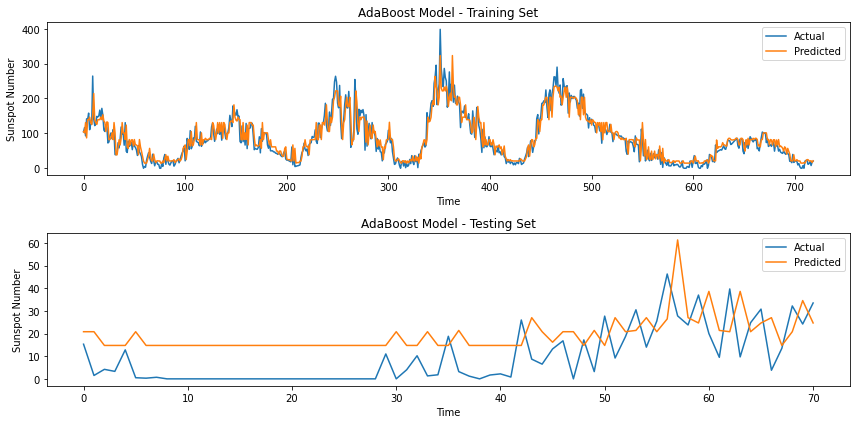

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    computation_time = time.time() - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Print execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds | CPU Usage: {cpu_usage:.5f} MHz | Memory Used: {memory_usage:.5f} MB")

    return train_rmse, test_rmse, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    start_time = time.time()
    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    computation_time = time.time() - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Print execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds | CPU Usage: {cpu_usage:.5f} MHz | Memory Used: {memory_usage:.5f} MB")

    return train_rmse, test_rmse, computation_time, y_train, train_predictions, y_test, test_predictions

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []

    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])

    return np.array(X), np.array(y)

# Train and evaluate the models
lstm_model = create_bidirectional_lstm_model(64)
adaboost_train_rmse, adaboost_test_rmse, adaboost_computation_time, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions = train_evaluate_adaboost_model(train_data, test_data)
lstm_train_rmse, lstm_test_rmse, lstm_computation_time, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions = train_evaluate_lstm_model(lstm_model, train_data, test_data)

# Print the results
print('AdaBoost Model:')
print('Train RMSE:', adaboost_train_rmse)
print('Test RMSE:', adaboost_test_rmse)

print('\nBidirectional LSTM Model:')
print('Train RMSE:', lstm_train_rmse)
print('Test RMSE:', lstm_test_rmse)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(adaboost_y_train, label='Actual')
plt.plot(adaboost_train_predictions, label='Predicted')
plt.title('AdaBoost Model - Training Set')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(adaboost_y_test, label='Actual')
plt.plot(adaboost_test_predictions, label='Predicted')
plt.title('AdaBoost Model - Testing Set')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()

plt.tight_layout()
plt.show()



Bidirectional LSTM Model:
2/2 [==============================] - 0s 6ms/step
Execution Time: 24.96485 seconds
CPU Usage: 40.00000 MHz
Memory Used: 598.03516 MB
Train RMSE: 25.155372341003776
Test RMSE: 10.100818777132641

AdaBoost Model:
Execution Time: 0.03356 seconds
CPU Usage: 66.70000 MHz
Memory Used: 598.28906 MB
Train RMSE: 26.182112267365596
Test RMSE: 14.505973447783376


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


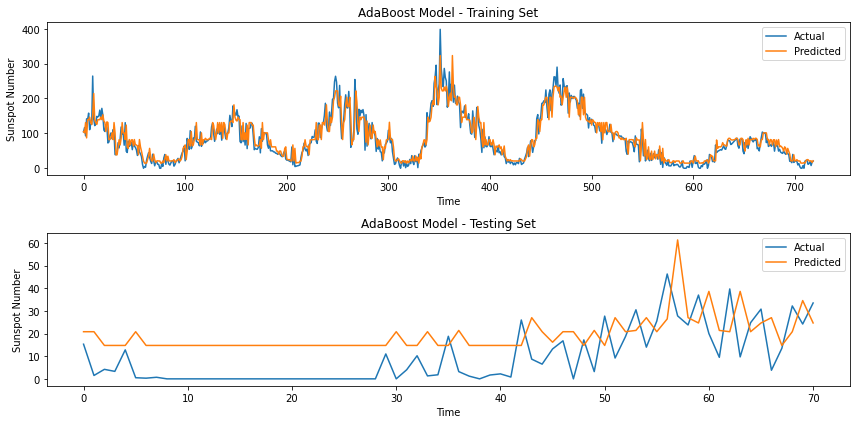

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    computation_time = time.time() - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Print execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    return train_rmse, test_rmse, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    start_time = time.time()
    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    computation_time = time.time() - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Print execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    return train_rmse, test_rmse, computation_time, y_train, train_predictions, y_test, test_predictions

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []

    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])

    return np.array(X), np.array(y)

# Train and evaluate the models
lstm_model = create_bidirectional_lstm_model(64)
print('\nBidirectional LSTM Model:')
lstm_train_rmse, lstm_test_rmse, lstm_computation_time, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions = train_evaluate_lstm_model(lstm_model, train_data, test_data)
print('Train RMSE:', lstm_train_rmse)
print('Test RMSE:', lstm_test_rmse)

# Train and evaluate the AdaBoost model
print('\nAdaBoost Model:')
adaboost_train_rmse, adaboost_test_rmse, adaboost_computation_time, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions = train_evaluate_adaboost_model(train_data, test_data)
print('Train RMSE:', adaboost_train_rmse)
print('Test RMSE:', adaboost_test_rmse)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(adaboost_y_train, label='Actual')
plt.plot(adaboost_train_predictions, label='Predicted')
plt.title('AdaBoost Model - Training Set')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(adaboost_y_test, label='Actual')
plt.plot(adaboost_test_predictions, label='Predicted')
plt.title('AdaBoost Model - Testing Set')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()

plt.tight_layout()
plt.show()



Bidirectional LSTM Model:
2/2 [==============================] - 0s 4ms/step
Execution Time: 26.17484 seconds
CPU Usage: 36.90000 MHz
Memory Used: 612.75391 MB
Train RMSE: 25.991888244595266
Test RMSE: 10.553201647805167

AdaBoost Model:
Execution Time: 0.02918 seconds
CPU Usage: 82.40000 MHz
Memory Used: 612.90234 MB
Train RMSE: 26.182112267365596
Test RMSE: 14.505973447783376


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


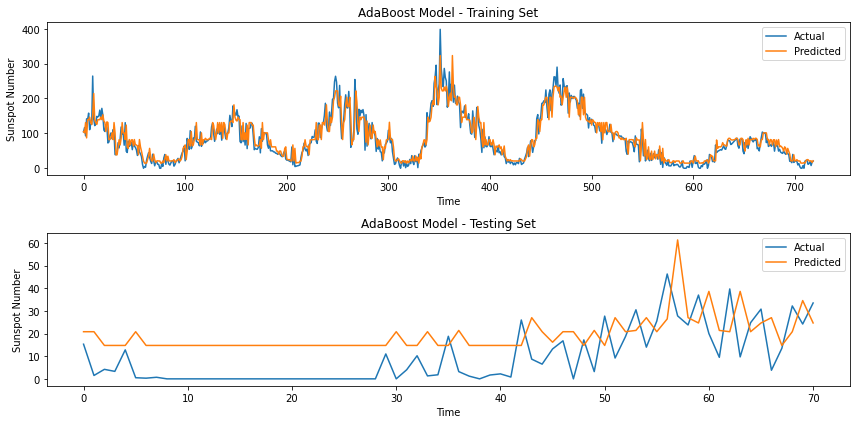

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    computation_time = time.time() - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Print execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    return train_rmse, test_rmse, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    start_time = time.time()
    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    computation_time = time.time() - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Print execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    return train_rmse, test_rmse, computation_time, y_train, train_predictions, y_test, test_predictions

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []

    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])

    return np.array(X), np.array(y)

# Train and evaluate the models
lstm_model = create_bidirectional_lstm_model(64)
print('\nBidirectional LSTM Model:')
lstm_train_rmse, lstm_test_rmse, lstm_computation_time, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions = train_evaluate_lstm_model(lstm_model, train_data, test_data)
print('Train RMSE:', lstm_train_rmse)
print('Test RMSE:', lstm_test_rmse)

# Train and evaluate the AdaBoost model
print('\nAdaBoost Model:')
adaboost_train_rmse, adaboost_test_rmse, adaboost_computation_time, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions = train_evaluate_adaboost_model(train_data, test_data)
print('Train RMSE:', adaboost_train_rmse)
print('Test RMSE:', adaboost_test_rmse)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(adaboost_y_train, label='Actual')
plt.plot(adaboost_train_predictions, label='Predicted')
plt.title('AdaBoost Model - Training Set')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(adaboost_y_test, label='Actual')
plt.plot(adaboost_test_predictions, label='Predicted')
plt.title('AdaBoost Model - Testing Set')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()

plt.tight_layout()
plt.show()


# 01- 10 Linear Regression Model


Linear Regression Model:
Execution Time: 0.00428 seconds
CPU Usage: 35.50000 MHz
Memory Used: 615.43359 MB
Train RMSE: 28.12167
Test RMSE: 12.96196
Train MAE: 19.11331
Test MAE: 10.75652
Train SMAPE: 33.53650
Test SMAPE: 122.44506
Train R2: 0.81891
Test R2: -0.14451


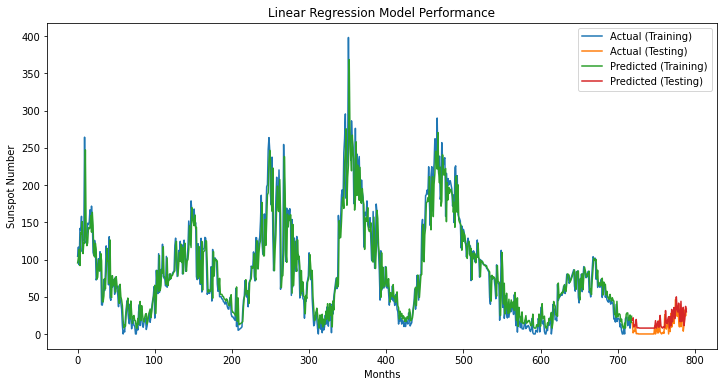

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Linear Regression model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
    test_smape = 100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions)))
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Print evaluation metrics, execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"\nLinear Regression Model:")
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")
    print(f"Train RMSE: {train_rmse:.5f}")
    print(f"Test RMSE: {test_rmse:.5f}")
    print(f"Train MAE: {train_mae:.5f}")
    print(f"Test MAE: {test_mae:.5f}")
    print(f"Train SMAPE: {train_smape:.5f}")
    print(f"Test SMAPE: {test_smape:.5f}")
    print(f"Train R2: {train_r2:.5f}")
    print(f"Test R2: {test_r2:.5f}")

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
start_time = time.time()
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
computation_time = time.time() - start_time

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Linear Regression Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 02-10 - SVR


SVR Model:
Execution Time: 0.02238 seconds
CPU Usage: 34.10000 MHz
Memory Used: 580.05469 MB
Train RMSE: 29.50432
Test RMSE: 29.70786
Train MAE: 22.48285
Test MAE: 27.70635
Train SMAPE: 40.52867
Test SMAPE: 137.19553
Train R2: 0.80066
Test R2: -5.01204


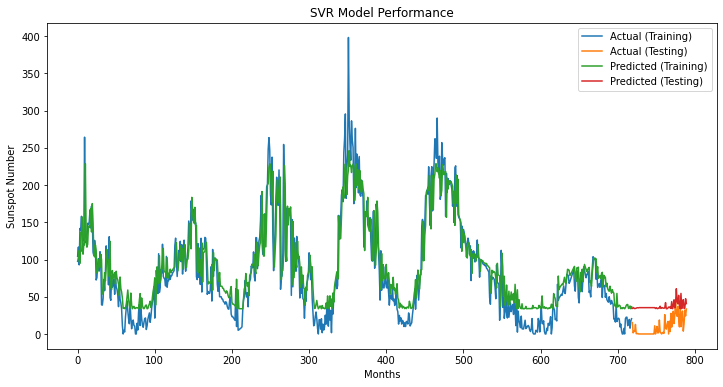

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the SVR model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the SVR model
    model = SVR()
    model.fit(X_train, y_train.ravel())

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
    test_smape = 100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions)))
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Print evaluation metrics, execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print("\nSVR Model:")
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")
    print(f"Train RMSE: {train_rmse:.5f}")
    print(f"Test RMSE: {test_rmse:.5f}")
    print(f"Train MAE: {train_mae:.5f}")
    print(f"Test MAE: {test_mae:.5f}")
    print(f"Train SMAPE: {train_smape:.5f}")
    print(f"Test SMAPE: {test_smape:.5f}")
    print(f"Train R2: {train_r2:.5f}")
    print(f"Test R2: {test_r2:.5f}")

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the SVR model
start_time = time.time()
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
computation_time = time.time() - start_time

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('SVR Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


In [21]:
import psutil
import platform

def get_system_information():
    # Get system information
    system = platform.uname()
    os_name = system.system
    os_version = system.release
    architecture = system.machine

    # Get RAM information
    ram = psutil.virtual_memory()
    total_ram = ram.total / (1024 ** 3)  # Convert to GB
    available_ram = ram.available / (1024 ** 3)  # Convert to GB

    # Print system information
    print("System Information:")
    print(f"Operating System: {os_name} {os_version}")
    print(f"Architecture: {architecture}")
    print(f"Total RAM: {total_ram:.2f} GB")
    print(f"Available RAM: {available_ram:.2f} GB")

# Call the function to get system information
get_system_information()


System Information:
Operating System: Windows 10
Architecture: AMD64
Total RAM: 31.88 GB
Available RAM: 10.49 GB


# 03- 10 - AdaBoost 

C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoost Model:
Train RMSE: 26.18211
Test RMSE: 14.50597

Train MAE: 14.92862
Test MAE: 10.99554
Train SMAPE: 28.51351
Test SMAPE: 124.71678
Train R2: 0.89590
Test R2: -0.08511

System Information:
Execution Time: 0.04122 seconds
CPU Usage: 37.6 MHz
Memory Used: 21602.12 MB



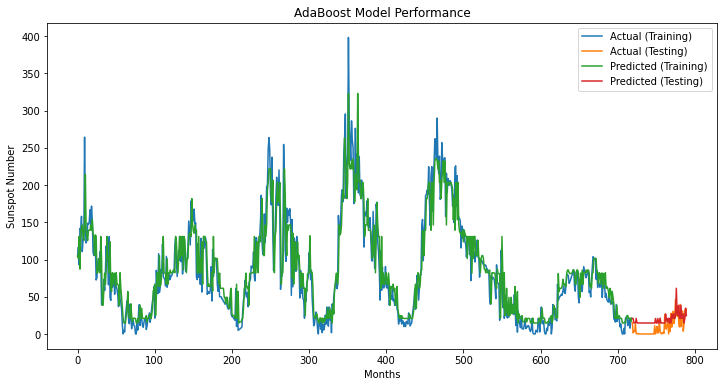

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import psutil
import time

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the AdaBoost model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
start_time = time.time()
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
end_time = time.time()
execution_time = end_time - start_time

# Calculate CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results and plot the predictions
print("AdaBoost Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print()

# Print additional evaluation metrics
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.1f} MHz")
print(f"Memory Used: {memory_usage:.2f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('AdaBoost Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 04- 10 LSTM 

3/3 [==============================] - 0s 3ms/step
Stacked LSTM Model:
Train RMSE: 30.08217
Test RMSE: 17.16836
Train MAE: 22.53598
Test MAE: 14.33101
Train SMAPE: 19.29273
Test SMAPE: 62.86067
Train R2: 0.79278
Test R2: -1.00788

System Information:
Execution Time: 14.88353 seconds
CPU Usage: 37.00000 MHz
Memory Used: 21815.40234 MB



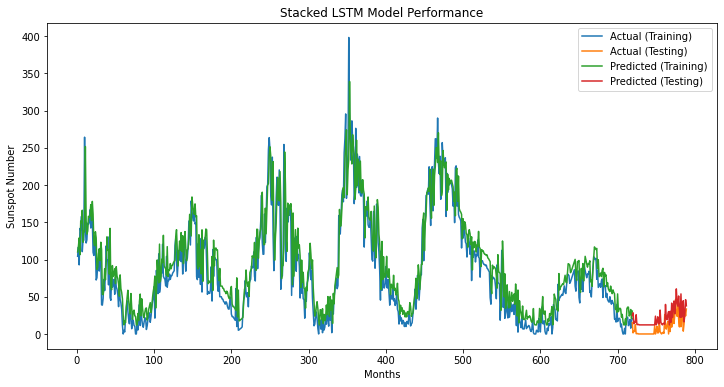

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import psutil
import time

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Stacked LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the Stacked LSTM model
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the Stacked LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the Stacked LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("Stacked LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Stacked LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import psutil
import time

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Stacked LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the Stacked LSTM model
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the Stacked LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the Stacked LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("Stacked LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Stacked LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 05- 10 : Stacked LSTM Model

3/3 [==============================] - 0s 5ms/step
Stacked LSTM Model:
Train RMSE: 4.09153
Test RMSE: 1.67286
Train MAE: 3.01377
Test MAE: 1.17324
Train SMAPE: 2.55245
Test SMAPE: 21.76564
Train R2: 0.99551
Test R2: 0.98619

System Information:
Execution Time: 23.93011 seconds
CPU Usage: 17.90000 MHz
Memory Used: 16617.26172 MB



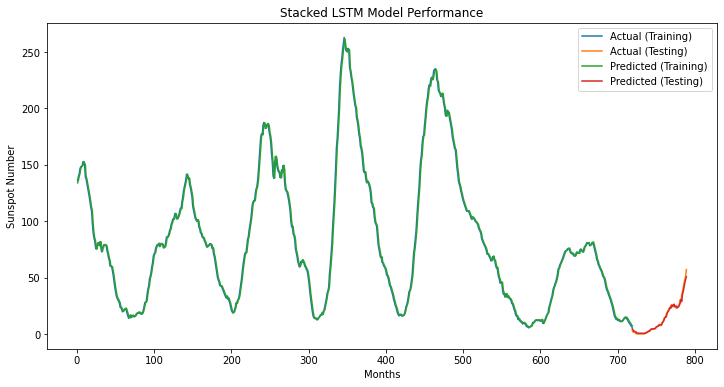

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import psutil
import time

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Smooth the 'Monthly Mean Total Sunspot Number' column with a 13-month window
data['Smoothed Sunspot Number'] = data['Monthly Mean Total Sunspot Number'].rolling(window=13).mean()

# Drop rows with missing values
data = data.dropna()

# Select the 'Smoothed Sunspot Number' column as the target variable
target = data['Smoothed Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Rest of the code remains the same...

# Train and evaluate the Stacked LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the Stacked LSTM model
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the Stacked LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the Stacked LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("Stacked LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Stacked LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

# 06- 10 ETS Model

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


ETS Model:
Train RMSE: 25.83712
Test RMSE: 14.25583
Train MAE: 18.01361
Test MAE: 11.59302
Train SMAPE: 16.93005
Test SMAPE: 66.68397
Train R2: 0.84693
Test R2: -0.40320

System Information:
Execution Time: 0.22450 seconds
CPU Usage: 33.3 MHz
Memory Used: 21863.29 MB



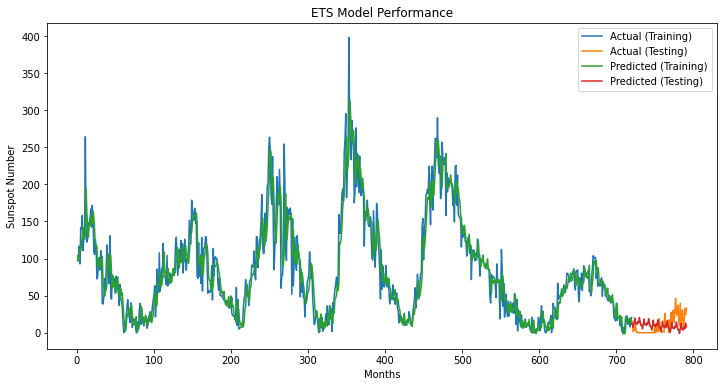

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import psutil
import time

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number']

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the ETS model
def train_evaluate_model(train_data, test_data):
    # Fit the ETS model
    model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
    model_fit = model.fit()

    # Make predictions
    train_predictions = model_fit.predict(start=0, end=len(train_data) - 1)
    test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(train_data.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(test_data.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the ETS model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("ETS Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.1f} MHz")
print(f"Memory Used: {memory_usage:.2f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('ETS Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


Smoothed data saved to smoothed_data.csv.
Indices and labels of NaN values:
Index: [0 7], Row: 0, Column: Smoothed Sunspot Number
Index: [1 7], Row: 1, Column: Smoothed Sunspot Number
Index: [2 7], Row: 2, Column: Smoothed Sunspot Number
Index: [3 7], Row: 3, Column: Smoothed Sunspot Number
Index: [4 7], Row: 4, Column: Smoothed Sunspot Number
Index: [5 7], Row: 5, Column: Smoothed Sunspot Number
Index: [6 7], Row: 6, Column: Smoothed Sunspot Number
Index: [7 7], Row: 7, Column: Smoothed Sunspot Number
Index: [8 7], Row: 8, Column: Smoothed Sunspot Number
Index: [9 7], Row: 9, Column: Smoothed Sunspot Number
Index: [10  7], Row: 10, Column: Smoothed Sunspot Number
Index: [11  7], Row: 11, Column: Smoothed Sunspot Number
Indices of NaN values:
[0 7]
[1 7]
[2 7]
[3 7]
[4 7]
[5 7]
[6 7]
[7 7]
[8 7]
[9 7]
[10  7]
[11  7]
Number of NaN values: 12
Number of infinity values: 0
Number of values too large for float64: 0


C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


ETS Model:
Train RMSE: 2.63138
Test RMSE: 59.17305
Train MAE: 1.86632
Test MAE: 47.26293
Train SMAPE: 1.74605
Test SMAPE: 241.60473
Train R2: 0.99814
Test R2: -16.41266

System Information:
Execution Time: 0.49117 seconds
CPU Usage: 11.9 MHz
Memory Used: 16030.58 MB



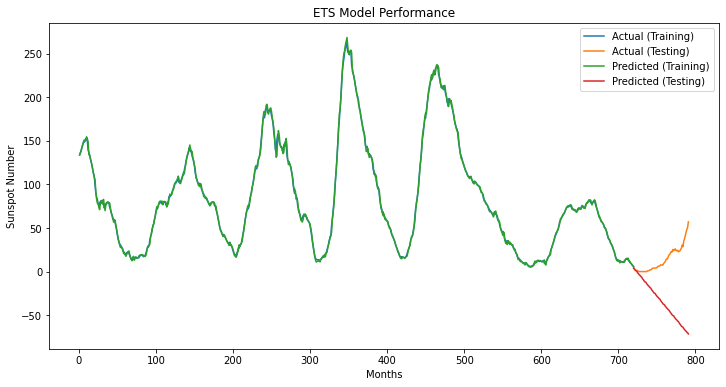

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import psutil
import time


# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Smooth the 'Monthly Mean Total Sunspot Number' column with a 13-month window
data['Smoothed Sunspot Number'] = data['Monthly Mean Total Sunspot Number'].rolling(window=13).mean()

#=======================================
# Save the smoothed data to a CSV file
smoothed_data_filename = 'smoothed_data.csv'
data.to_csv(smoothed_data_filename, index=False)

print(f"Smoothed data saved to {smoothed_data_filename}.")

#=======================================
# Find the indices of NaN values
nan_indices = np.argwhere(np.isnan(data.values))

# Find the indices of infinity values
inf_indices = np.argwhere(np.isinf(data.values))

# Find the indices of values too large for float64
large_indices = np.argwhere((np.isfinite(data.values)) & (np.abs(data.values) > np.finfo(np.float64).max))

# Print the indices and corresponding labels of NaN values
if len(nan_indices) > 0:
    print("Indices and labels of NaN values:")
    for index in nan_indices:
        row_index, col_index = index
        row_label = data.index[row_index]
        col_label = data.columns[col_index]
        print(f"Index: {index}, Row: {row_label}, Column: {col_label}")

# Print the indices and corresponding labels of infinity values
if len(inf_indices) > 0:
    print("Indices and labels of infinity values:")
    for index in inf_indices:
        row_index, col_index = index
        row_label = data.index[row_index]
        col_label = data.columns[col_index]
        print(f"Index: {index}, Row: {row_label}, Column: {col_label}")

# Print the indices and corresponding labels of values too large for float64
if len(large_indices) > 0:
    print("Indices and labels of values too large for float64:")
    for index in large_indices:
        row_index, col_index = index
        row_label = data.index[row_index]
        col_label = data.columns[col_index]
        print(f"Index: {index}, Row: {row_label}, Column: {col_label}")




#========================================

# Find the indices of NaN values
nan_indices = np.argwhere(np.isnan(data.values))

# Find the indices of infinity values
inf_indices = np.argwhere(np.isinf(data.values))

# Find the indices of values too large for float64
large_indices = np.argwhere((np.isfinite(data.values)) & (np.abs(data.values) > np.finfo(np.float64).max))

# Print the indices of NaN values
if len(nan_indices) > 0:
    print("Indices of NaN values:")
    for index in nan_indices:
        print(index)

# Print the indices of infinity values
if len(inf_indices) > 0:
    print("Indices of infinity values:")
    for index in inf_indices:
        print(index)

# Print the indices of values too large for float64
if len(large_indices) > 0:
    print("Indices of values too large for float64:")
    for index in large_indices:
        print(index)


#========================================

# Count NaN values
nan_count = data.isna().sum().sum()

# Count infinity values
inf_count = np.isinf(data.values).sum()

# Count values too large for float64
large_value_count = np.isfinite(data.values) & (np.abs(data.values) > np.finfo(np.float64).max)
large_value_count = large_value_count.sum()

print("Number of NaN values:", nan_count)
print("Number of infinity values:", inf_count)
print("Number of values too large for float64:", large_value_count)

# Drop rows with missing values
data = data.dropna() 

# Select the 'Smoothed Sunspot Number' column as the target variable
target = data['Smoothed Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Rest of the code remains the same...


# Train and evaluate the ETS model
def train_evaluate_model(train_data, test_data):
    # Fit the ETS model
    model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
    model_fit = model.fit()

    # Make predictions
    train_predictions = model_fit.predict(start=0, end=len(train_data) - 1)
    test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(train_data.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(test_data.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the ETS model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("ETS Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.1f} MHz")
print(f"Memory Used: {memory_usage:.2f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('ETS Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


In [54]:
ls

 Volume in drive C has no label.
 Volume Serial Number is EC6B-1EF0

 Directory of C:\Users\Storm

06/29/2023  03:14 AM    <DIR>          .
06/05/2021  02:31 PM    <DIR>          ..
11/07/2022  02:07 AM    <DIR>          .anaconda
08/02/2022  04:08 PM    <DIR>          .android
02/07/2023  12:51 PM    <DIR>          .cache
01/20/2023  05:51 PM    <DIR>          .conda
11/05/2022  06:14 PM                42 .condarc
02/07/2023  12:51 PM    <DIR>          .config
04/12/2022  03:08 AM    <DIR>          .continuum
02/07/2023  12:51 PM    <DIR>          .dbus-keyrings
09/20/2022  02:32 PM               922 .env_uo.bat
08/22/2022  08:26 PM    <DIR>          .genopt3.1.1
09/18/2022  05:42 AM    <DIR>          .honeybee
06/27/2023  12:33 PM    <DIR>          .ipynb_checkpoints
04/12/2022  03:14 AM    <DIR>          .ipython
01/14/2023  03:54 AM    <DIR>          .jupyter
01/27/2023  08:34 AM    <DIR>          .kaggle
11/27/2022  04:33 AM    <DIR>          .keras
09/18/2022  04:15 AM    <DIR>  

2/2 [==============================] - 0s 5ms/step
Hidden Units: 19
Train RMSE: 25.64
Test RMSE: 9.20



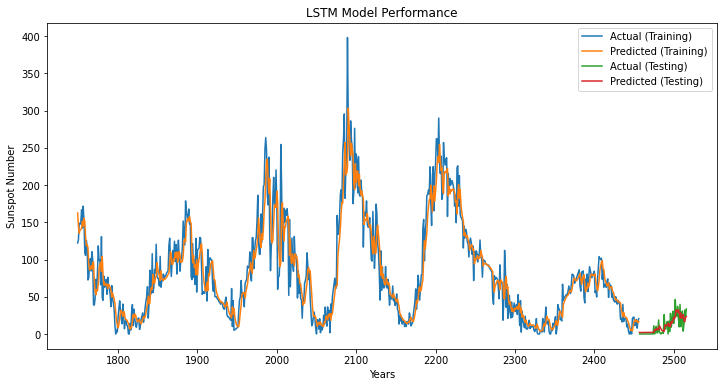

System Information:
Execution Time: 16.37348 seconds
CPU Usage: 36.70000 MHz
Memory Used: 21778.70312 MB


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import psutil
import time

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create LSTM model
def create_lstm_model(units):
    model = Sequential()
    model.add(LSTM(units, input_shape=(12, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the LSTM model
def train_evaluate_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Set the hyperparameters
hidden_units = [19]
time_intervals = 792

results = []

# Measure execution time
start_time = time.time()

# Perform the comparative study
for units in hidden_units:
    model = create_lstm_model(units)
    train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(model, train_data, test_data)
    results.append((units, train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions))

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results and system information
for units, train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions in results:
    print(f"Hidden Units: {units}")
    print(f"Train RMSE: {train_rmse:.5f}")
    print(f"Test RMSE: {test_rmse:.5f}")
    print()

    # Plot the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(range(1749, 1749 + len(y_train)), y_train, label='Actual (Training)')
    plt.plot(range(1749, 1749 + len(y_train)), train_predictions, label='Predicted (Training)')
    plt.plot(range(1749 + len(y_train), 1749 + len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
    plt.plot(range(1749 + len(y_train), 1749 + len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
    plt.title('LSTM Model Performance')
    plt.xlabel('Years')
    plt.ylabel('Sunspot Number')
    plt.legend()
    plt.show()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")


2/2 [==============================] - 0s 4ms/step
Hidden Units: 19
Train RMSE: 25.69772
Test RMSE: 9.21135
Train MAE: 17.74029
Test MAE: 6.48565
Train SMAPE: 16.22809
Test SMAPE: 57.39047
Train R2: 0.84853
Test R2: 0.47134



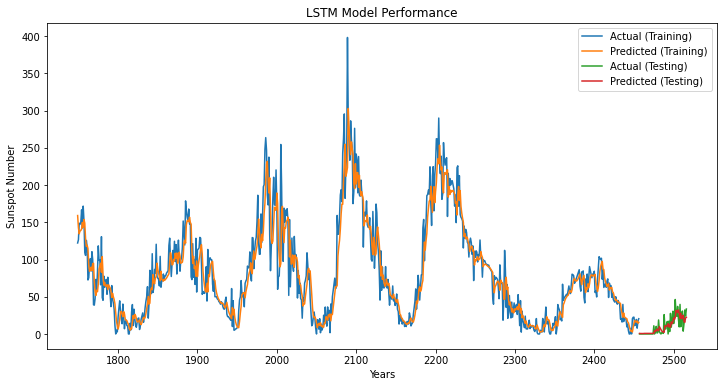

System Information:
Execution Time: 687.26562 seconds
CPU Usage: 1.50000 MHz
Memory Used: 593.04688 MB


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
import psutil
import time

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create LSTM model
def create_lstm_model(units):
    model = Sequential()
    model.add(LSTM(units, input_shape=(12, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the LSTM model
def train_evaluate_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Set the hyperparameters
hidden_units = [19]
time_intervals = 792

results = []

# Perform the comparative study
for units in hidden_units:
    model = create_lstm_model(units)
    train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(model, train_data, test_data)
    results.append((units, train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions))

# Print the results
for units, train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions in results:
    print(f"Hidden Units: {units}")
    print(f"Train RMSE: {train_rmse:.5f}")
    print(f"Test RMSE: {test_rmse:.5f}")
    print(f"Train MAE: {train_mae:.5f}")
    print(f"Test MAE: {test_mae:.5f}")
    print(f"Train SMAPE: {train_smape:.5f}")
    print(f"Test SMAPE: {test_smape:.5f}")
    print(f"Train R2: {train_r2:.5f}")
    print(f"Test R2: {test_r2:.5f}")
    print()

    # Plot the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(range(1749, 1749 + len(y_train)), y_train, label='Actual (Training)')
    plt.plot(range(1749, 1749 + len(y_train)), train_predictions, label='Predicted (Training)')
    plt.plot(range(1749 + len(y_train), 1749 + len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
    plt.plot(range(1749 + len(y_train), 1749 + len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
    plt.title('LSTM Model Performance')
    plt.xlabel('Years')
    plt.ylabel('Sunspot Number')
    plt.legend()
    plt.show()

# Print system information
process = psutil.Process()
execution_time = time.process_time()
cpu_usage = process.cpu_percent(interval=1)
memory_usage = process.memory_info().rss / 1024 / 1024  # Convert to MB

print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")


3/3 [==============================] - 0s 2ms/step
LSTM Model:
Train RMSE: 28.22553
Test RMSE: 11.46306
Train MAE: 19.03025
Test MAE: 8.79189
Train SMAPE: 16.86861
Test SMAPE: 61.47543
Train R2: 0.81757
Test R2: 0.10488

System Information:
Execution Time: 14.50312 seconds
CPU Usage: 16.40000 MHz
Memory Used: 16463.55469 MB



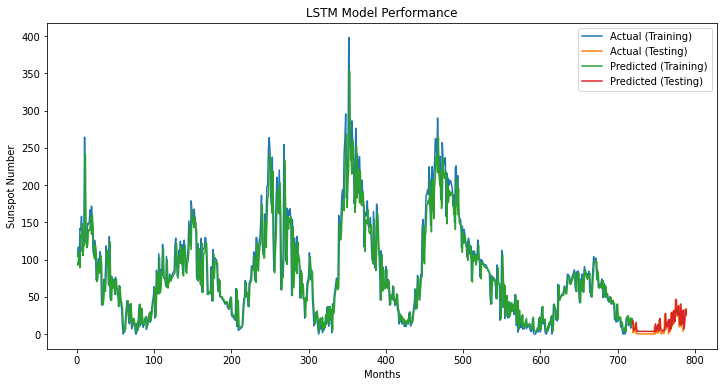

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import psutil
import time

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


3/3 [==============================] - 0s 3ms/step
LSTM Model:
Train RMSE: 4.09741
Test RMSE: 1.78875
Train MAE: 2.95833
Test MAE: 1.28111
Train SMAPE: 2.52315
Test SMAPE: 22.29374
Train R2: 0.99550
Test R2: 0.98421

System Information:
Execution Time: 14.65315 seconds
CPU Usage: 17.90000 MHz
Memory Used: 16419.42578 MB



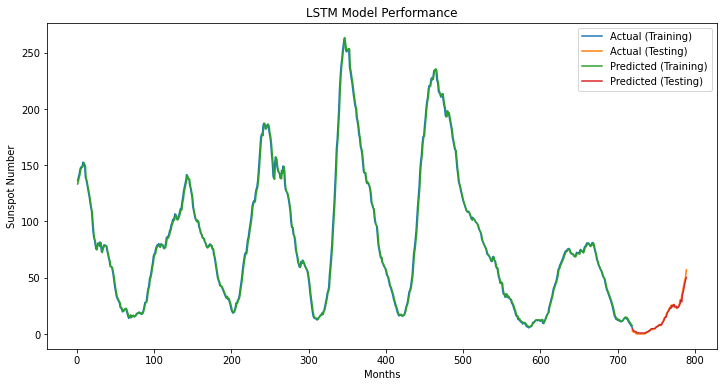

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import psutil
import time

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Smooth the 'Monthly Mean Total Sunspot Number' column with a 13-month window
data['Smoothed Sunspot Number'] = data['Monthly Mean Total Sunspot Number'].rolling(window=13).mean()

# Drop rows with missing values
data = data.dropna()

# Select the 'Smoothed Sunspot Number' column as the target variable
target = data['Smoothed Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Rest of the code remains the same...

# Train and evaluate the LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 07- 10 : Bidirectional LSTM Model

3/3 [==============================] - 0s 5ms/step
Bidirectional LSTM Model:
Train RMSE: 28.31696
Test RMSE: 11.33451
Train MAE: 19.12310
Test MAE: 8.40387
Train SMAPE: 17.14191
Test SMAPE: 61.84561
Train R2: 0.81638
Test R2: 0.12485

System Information:
Execution Time: 19.86088 seconds
CPU Usage: 17.30000 MHz
Memory Used: 16776.49609 MB



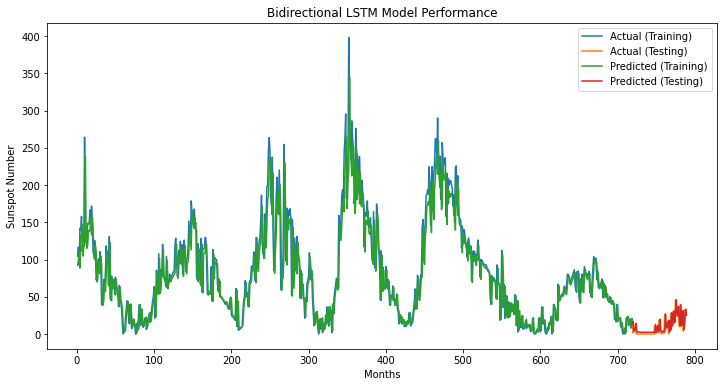

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
import psutil
import time

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the Bidirectional LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(64), input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the Bidirectional LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the Bidirectional LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("Bidirectional LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Bidirectional LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


3/3 [==============================] - 0s 4ms/step
Bidirectional LSTM Model:
Train RMSE: 4.08666
Test RMSE: 1.78085
Train MAE: 2.94001
Test MAE: 1.16842
Train SMAPE: 2.46994
Test SMAPE: 21.19250
Train R2: 0.99552
Test R2: 0.98435

System Information:
Execution Time: 19.82288 seconds
CPU Usage: 32.50000 MHz
Memory Used: 16725.85938 MB



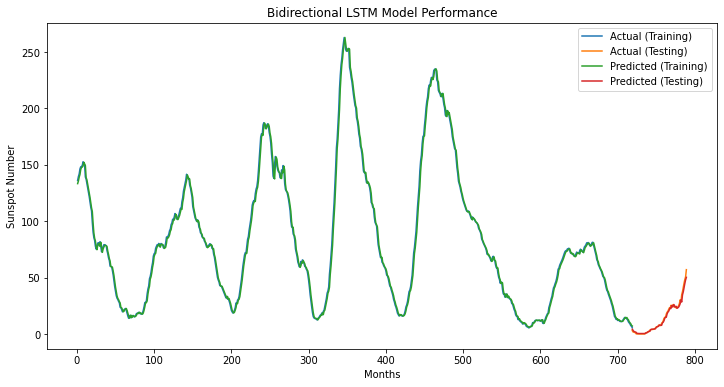

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
import psutil
import time

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Smooth the 'Monthly Mean Total Sunspot Number' column with a 13-month window
data['Smoothed Sunspot Number'] = data['Monthly Mean Total Sunspot Number'].rolling(window=13).mean()

# Drop rows with missing values
data = data.dropna()

# Select the 'Smoothed Sunspot Number' column as the target variable
target = data['Smoothed Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Rest of the code remains the same...



# Train and evaluate the Bidirectional LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the Bidirectional LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(64), input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the Bidirectional LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the Bidirectional LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("Bidirectional LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Bidirectional LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

# 08 - 10 GRU Model

3/3 [==============================] - 0s 3ms/step
GRU Model:
Train RMSE: 28.10214
Test RMSE: 11.66020
Train MAE: 18.96520
Test MAE: 7.96224
Train SMAPE: 17.82742
Test SMAPE: 65.70464
Train R2: 0.81916
Test R2: 0.07383
Computation Time: 22.22188 seconds
CPU Usage: 21.10 MHz
Memory Used: 16635.60 MB


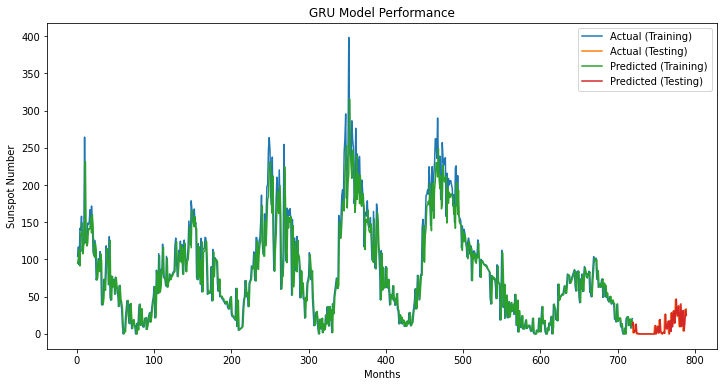

In [43]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the GRU model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for GRU
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the GRU model
    model = Sequential()
    model.add(GRU(64, input_shape=(1, 1), return_sequences=True))
    model.add(GRU(64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the GRU model
    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    end_time = time.time()
    computation_time = end_time - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the GRU model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("GRU Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print(f"Computation Time: {computation_time:.5f} seconds")

# Measure CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # in MB

print(f"CPU Usage: {cpu_usage:.2f} MHz")
print(f"Memory Used: {memory_usage:.2f} MB")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('GRU Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 09 - 10 GBM Model

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the GBM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the GBM model
    start_time = time.time()
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    end_time = time.time()
    computation_time = end_time - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the GBM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Gradient Boosting Machines (GBM) Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print(f"Computation Time: {computation_time:.5f} seconds")
print()

# Measure CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # in MB

print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Gradient Boosting Machines (GBM) Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 10 - 10 RF Model

C:\Users\Storm\AppData\Local\Temp/ipykernel_1852/12496901.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Model:
Train RMSE: 16.43484
Test RMSE: 13.57460
Train MAE: 11.53019
Test MAE: 11.32157
Train SMAPE: 23.69960
Test SMAPE: 129.43665
Train R2: 0.93815
Test R2: -0.25526
Computation Time: 0.25076 seconds

CPU Usage: 19.00000 MHz
Memory Used: 16424.73047 MB



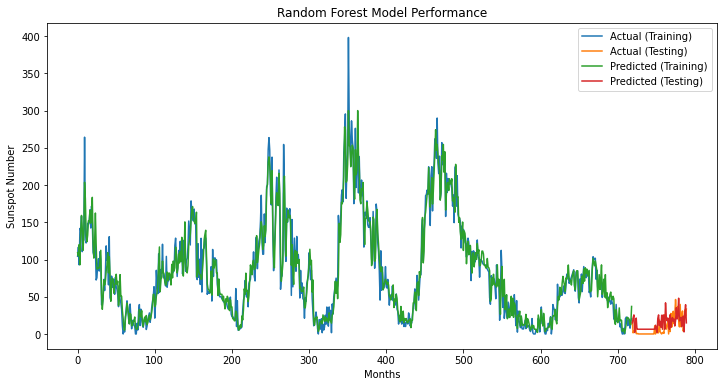

In [44]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Random Forest model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    start_time = time.time()
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    end_time = time.time()
    computation_time = end_time - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Random Forest Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print(f"Computation Time: {computation_time:.5f} seconds")
print()

# Measure CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # in MB

print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Random Forest Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_1852/943918894.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Voting Ensemble Results:
Train RMSE: 16.43484
Test RMSE: 13.57460
Train MAE: 11.53019
Test MAE: 11.32157
Train SMAPE: 11.84980
Test SMAPE: 64.71832
Train R2: 0.93815
Test R2: -0.25526
Execution Time: 0.20309 seconds
CPU Usage: 45.00000 MHz
Memory Used: 21971.53792 MB

Averaging Results:
Train RMSE: 28.12167
Test RMSE: 12.96196
Train MAE: 19.11331
Test MAE: 10.75652
Train SMAPE: 16.76825
Test SMAPE: 61.22253
Train R2: 0.81891
Test R2: -0.14451
Execution Time: 0.01231 seconds
CPU Usage: 75.00000 MHz
Memory Used: 21972.21376 MB

Median Results:
Train RMSE: 18.83120
Test RMSE: 12.83755
Train MAE: 13.30987
Test MAE: 11.16844
Train SMAPE: 13.19366
Test SMAPE: 62.88636
Train R2: 0.91880
Test R2: -0.12265
Execution Time: 0.22413 seconds
CPU Usage: 69.00000 MHz
Memory Used: 21986.48013 MB



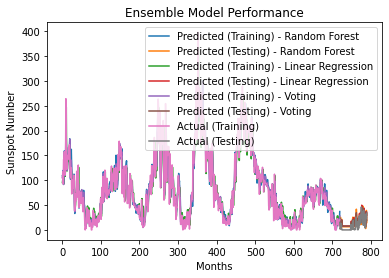

In [32]:
# Define the Voting ensemble model
voting_model = VotingRegressor(estimators=models[:-1])

# Add the Voting ensemble model to the models list
models.append(('Voting', voting_model))

# Train and evaluate the models
results = []

for name, model in models:
    start_time = time.time()
    
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    cpu_usage = psutil.cpu_percent()
    memory_used = psutil.virtual_memory().used / 1e6

    execution_time = time.time() - start_time

    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train SMAPE': train_smape,
        'Test SMAPE': test_smape,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Execution Time': execution_time,
        'CPU Usage': cpu_usage,
        'Memory Used': memory_used,
        'Train Predictions': train_predictions.flatten(),
        'Test Predictions': test_predictions.flatten()
    })

# Print the results for Voting ensemble, averaging, and median
voting_result = results[-3]
averaging_result = results[-2]
median_result = results[-1]

print("Voting Ensemble Results:")
print(f"Train RMSE: {voting_result['Train RMSE']:.5f}")
print(f"Test RMSE: {voting_result['Test RMSE']:.5f}")
print(f"Train MAE: {voting_result['Train MAE']:.5f}")
print(f"Test MAE: {voting_result['Test MAE']:.5f}")
print(f"Train SMAPE: {voting_result['Train SMAPE']:.5f}")
print(f"Test SMAPE: {voting_result['Test SMAPE']:.5f}")
print(f"Train R2: {voting_result['Train R2']:.5f}")
print(f"Test R2: {voting_result['Test R2']:.5f}")
print(f"Execution Time: {voting_result['Execution Time']:.5f} seconds")
print(f"CPU Usage: {voting_result['CPU Usage']:.5f} MHz")
print(f"Memory Used: {voting_result['Memory Used']:.5f} MB")
print()

print("Averaging Results:")
print(f"Train RMSE: {averaging_result['Train RMSE']:.5f}")
print(f"Test RMSE: {averaging_result['Test RMSE']:.5f}")
print(f"Train MAE: {averaging_result['Train MAE']:.5f}")
print(f"Test MAE: {averaging_result['Test MAE']:.5f}")
print(f"Train SMAPE: {averaging_result['Train SMAPE']:.5f}")
print(f"Test SMAPE: {averaging_result['Test SMAPE']:.5f}")
print(f"Train R2: {averaging_result['Train R2']:.5f}")
print(f"Test R2: {averaging_result['Test R2']:.5f}")
print(f"Execution Time: {averaging_result['Execution Time']:.5f} seconds")
print(f"CPU Usage: {averaging_result['CPU Usage']:.5f} MHz")
print(f"Memory Used: {averaging_result['Memory Used']:.5f} MB")
print()

print("Median Results:")
print(f"Train RMSE: {median_result['Train RMSE']:.5f}")
print(f"Test RMSE: {median_result['Test RMSE']:.5f}")
print(f"Train MAE: {median_result['Train MAE']:.5f}")
print(f"Test MAE: {median_result['Test MAE']:.5f}")
print(f"Train SMAPE: {median_result['Train SMAPE']:.5f}")
print(f"Test SMAPE: {median_result['Test SMAPE']:.5f}")
print(f"Train R2: {median_result['Train R2']:.5f}")
print(f"Test R2: {median_result['Test R2']:.5f}")
print(f"Execution Time: {median_result['Execution Time']:.5f} seconds")
print(f"CPU Usage: {median_result['CPU Usage']:.5f} MHz")
print(f"Memory Used: {median_result['Memory Used']:.5f} MB")
print()

# Plot the predictions
for i, result in enumerate(results[-3:]):
    plt.plot(range(1, len(y_train) + 1), result['Train Predictions'], label=f'Predicted (Training) - {result["Model"]}')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), result['Test Predictions'], label=f'Predicted (Testing) - {result["Model"]}')

plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')

plt.title('Ensemble Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()
